**How accurate are moneyline odds when compared to seasonal team standings? (Kevin Pereira)**






In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Below, we can see the overall standings of the Eastern and Western Conferences, displayed are the teams as well as their overall win loss percentage from the 2020-21 season.

                   Team   W/L%
0   Philadelphia 76ers*  0.681
1        Brooklyn Nets*  0.667
2      Milwaukee Bucks*  0.639
3      New York Knicks*  0.569
4        Atlanta Hawks*  0.569
5           Miami Heat*  0.556
6       Boston Celtics*  0.500
7   Washington Wizards*  0.472
8        Indiana Pacers  0.472
9     Charlotte Hornets  0.458
10        Chicago Bulls  0.431
11      Toronto Raptors  0.375
12  Cleveland Cavaliers  0.306
13        Orlando Magic  0.292
14      Detroit Pistons  0.278


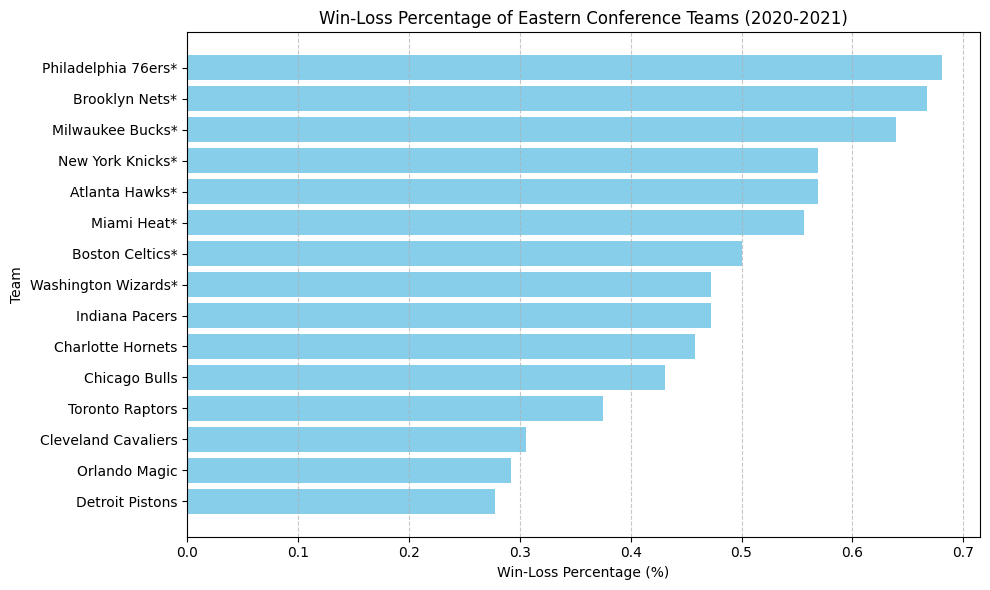

In [5]:
E_standings = pd.read_csv('2020_21_E_Standings.csv')

teams_and_wl_e = E_standings[['Team','W/L%']]

print(teams_and_wl_e)

team_and_wl = E_standings[['Team', 'W/L%']]

team_and_wl_sorted = team_and_wl.sort_values(by='W/L%', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(team_and_wl_sorted['Team'], team_and_wl_sorted['W/L%'], color='skyblue')
plt.xlabel('Win-Loss Percentage (%)')
plt.ylabel('Team')
plt.title('Win-Loss Percentage of Eastern Conference Teams (2020-2021)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest W/L% at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This horizontal bar chart serves as a visual representation for the overall win-loss percentages for eastern conference teams.

                       Team   W/L%
0                Utah Jazz*  0.722
1             Phoenix Suns*  0.708
2           Denver Nuggets*  0.653
3     Los Angeles Clippers*  0.653
4         Dallas Mavericks*  0.583
5   Portland Trail Blazers*  0.583
6       Los Angeles Lakers*  0.583
7     Golden State Warriors  0.542
8        Memphis Grizzlies*  0.528
9         San Antonio Spurs  0.458
10     New Orleans Pelicans  0.431
11         Sacramento Kings  0.431
12   Minnesota Timberwolves  0.319
13    Oklahoma City Thunder  0.306
14          Houston Rockets  0.236


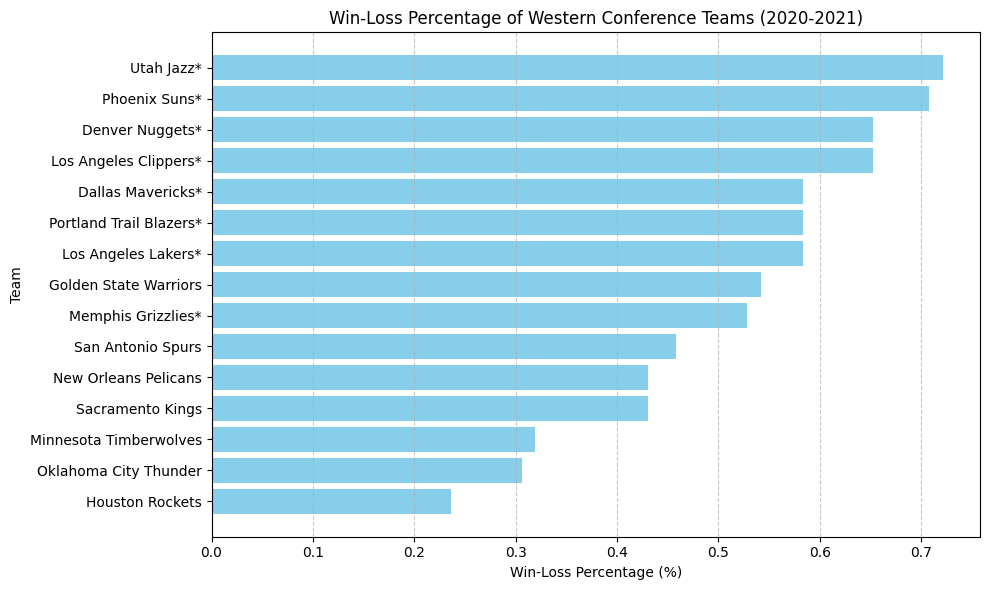

In [6]:
W_standings = pd.read_csv('2020_21_W_Standings.csv')

teams_and_wl_w = W_standings[['Team','W/L%']]

print(teams_and_wl_w)

team_and_wl_sorted = teams_and_wl_w.sort_values(by='W/L%', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(team_and_wl_sorted['Team'], team_and_wl_sorted['W/L%'], color='skyblue')
plt.xlabel('Win-Loss Percentage (%)')
plt.ylabel('Team')
plt.title('Win-Loss Percentage of Western Conference Teams (2020-2021)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest W/L% at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This horizontal bar chart serves as a visual representation for the overall win-loss percentages for Western conference teams.

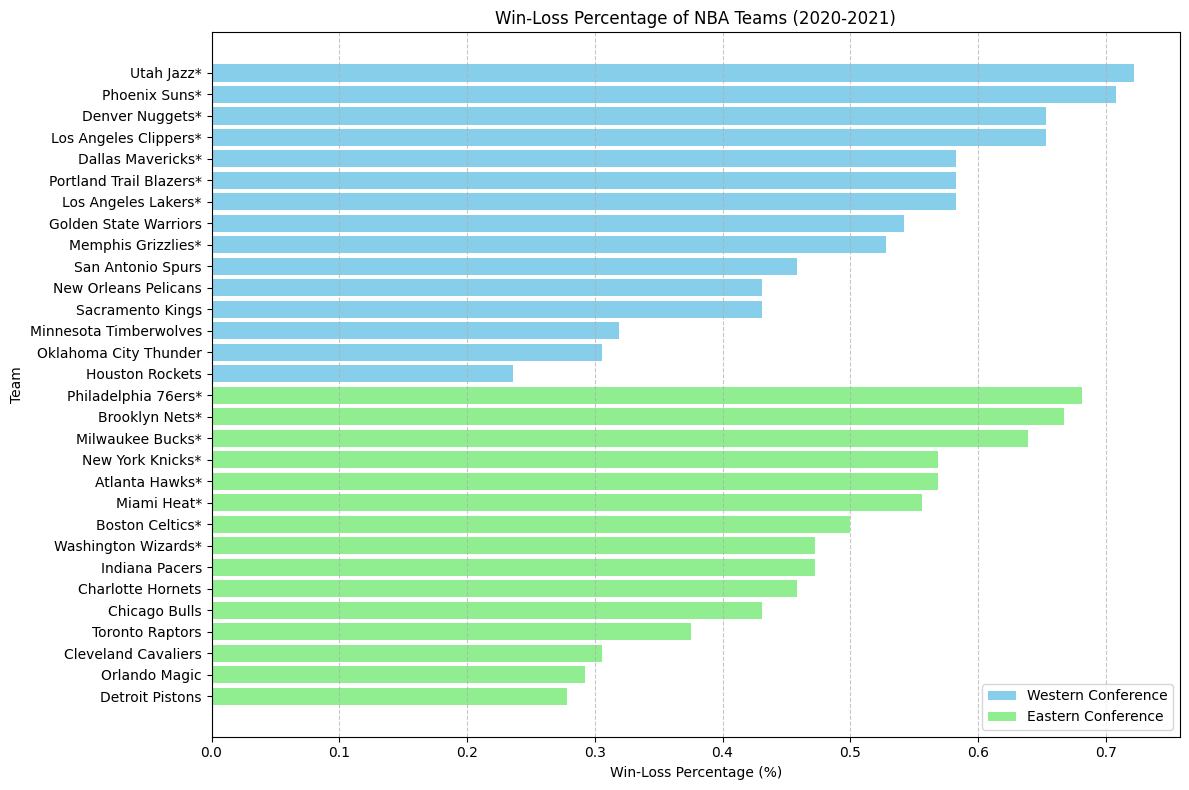

In [7]:
# Load data for both conferences
E_standings = pd.read_csv('2020_21_E_Standings.csv')
W_standings = pd.read_csv('2020_21_W_Standings.csv')

# Extract relevant columns
teams_and_wl_e = E_standings[['Team','W/L%']]
teams_and_wl_w = W_standings[['Team','W/L%']]

# Sort dataframes by W/L%
team_and_wl_sorted_e = teams_and_wl_e.sort_values(by='W/L%', ascending=False)
team_and_wl_sorted_w = teams_and_wl_w.sort_values(by='W/L%', ascending=False)

# Plot combined graph
plt.figure(figsize=(12, 8))

# Eastern Conference (colored blue)
plt.barh(team_and_wl_sorted_w['Team'], team_and_wl_sorted_w['W/L%'], color='skyblue', label='Western Conference')

# Western Conference (colored green)
plt.barh(team_and_wl_sorted_e['Team'], team_and_wl_sorted_e['W/L%'], color='lightgreen', label='Eastern Conference')

plt.xlabel('Win-Loss Percentage (%)')
plt.ylabel('Team')
plt.title('Win-Loss Percentage of NBA Teams (2020-2021)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest W/L% at the top
plt.legend()  # Add legend
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This barchart combines both confrences' data into a single chart

## Moneyline ##

**What is Moneyline?**

Moneyline is one of the easiest wagers for first time bettors to get into. The basis of it revolves around an underdog and a favorite. 
Bettor's can choose to bet for their favorite teams or whoever they precieve will have the highest chances of winning. The way that moneyline bets are typically displayed is by giving the favorite (the team with the higher probability of winning) a negative score i.e. -200 or -150, and giving the underdog (the team with a lower probability of winning) a positive score i.e. +200 or +150. The bets a team gets, makes that team the favorite to win, the team with the lower amount of bets makes that team the underdog.

Now lets take a look at the overall bet outcomes from the 2021-22 season and focus on the moneyline odds.

In [8]:
df = pd.read_csv('NBA_2021_2022_Bet_Outcomes.csv')

filter1 = df['ML'] < 0

df.where(filter1, inplace=True)

df = df.dropna()

df = df.groupby('Team')['ML'].count()

df


Team
Atlanta         54
Boston          78
Brooklyn        58
Charlotte       31
Chicago         50
Cleveland       40
Dallas          56
Denver          54
Detroit          7
Golden State     1
GoldenState     79
Houston          7
Indiana         36
LAClippers      43
LALakers        45
Memphis         61
Miami           70
Milwaukee       75
Minnesota       48
NewOrleans      24
NewYork         41
OklahomaCity     4
Orlando          9
Philadelphia    65
Phoenix         83
Portland        30
Sacramento      27
SanAntonio      31
Toronto         46
Utah            79
Washington      32
Name: ML, dtype: int64

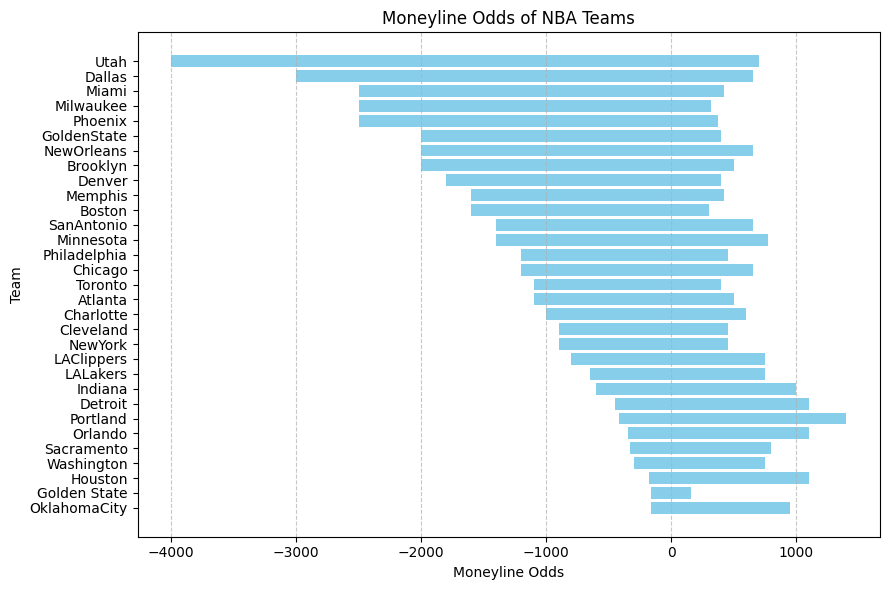

In [11]:
df = pd.read_csv('NBA_2021_2022_Bet_Outcomes.csv')

team_and_ml = df[['Team', 'ML']]

team_and_ml_sorted = team_and_ml.sort_values(by='ML')

plt.figure(figsize=(9, 6))
plt.barh(team_and_ml_sorted['Team'], team_and_ml_sorted['ML'], color='skyblue')
plt.xlabel('Moneyline Odds')
plt.ylabel('Team')
plt.title('Moneyline Odds of NBA Teams')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest ML at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Average moneyline odds for each NBA team (both eastern and western confernce)

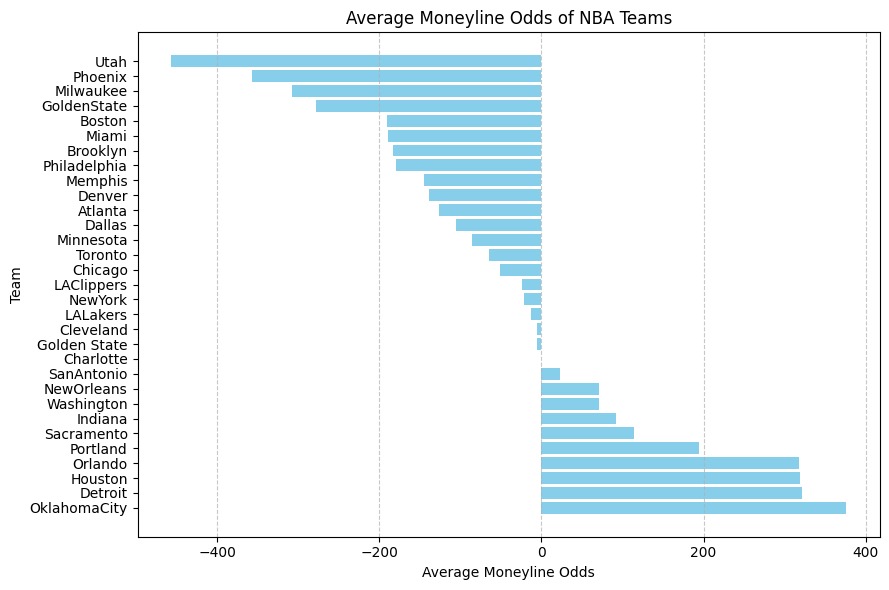

In [13]:


df = pd.read_csv('NBA_2021_2022_Bet_Outcomes.csv')

team_and_ml = df[['Team', 'ML']]

average_ml_per_team = team_and_ml.groupby('Team')['ML'].mean().reset_index()

average_ml_per_team_sorted = average_ml_per_team.sort_values(by='ML')

plt.figure(figsize=(9, 6))
plt.barh(average_ml_per_team_sorted['Team'], average_ml_per_team_sorted['ML'], color='skyblue')
plt.xlabel('Average Moneyline Odds')
plt.ylabel('Team')
plt.title('Average Moneyline Odds of NBA Teams')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest ML at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Statistical Analysis**

The segment of code below, outputs the mean, median, and standard deviation for all teams' moneyline odds

In [14]:

df = pd.read_csv('NBA_2021_2022_Bet_Outcomes.csv')

team_and_ml = df[['Team', 'ML']]

average_ml_per_team = team_and_ml.groupby('Team')['ML'].mean().reset_index()

mean_ml = average_ml_per_team['ML'].mean()
median_ml = average_ml_per_team['ML'].median()
std_dev_ml = average_ml_per_team['ML'].std()
min_ml = average_ml_per_team['ML'].min()
max_ml = average_ml_per_team['ML'].max()

print("Statistical Analysis for Average Moneyline Odds of NBA Teams:")
print("Mean Moneyline Odds:", mean_ml)
print("Median Moneyline Odds:", median_ml)
print("Standard Deviation of Moneyline Odds:", std_dev_ml)
print("Minimum Moneyline Odds:", min_ml)
print("Maximum Moneyline Odds:", max_ml)


Statistical Analysis for Average Moneyline Odds of NBA Teams:
Mean Moneyline Odds: -33.056179372746875
Median Moneyline Odds: -23.333333333333332
Standard Deviation of Moneyline Odds: 200.91932777131396
Minimum Moneyline Odds: -456.42045454545456
Maximum Moneyline Odds: 375.9146341463415


The segment of code below outputs the mean, median, minimum/maximum odds, and standard deviation for each teams moneyline odds

In [18]:
team_and_ml = df[['Team', 'ML']]

average_ml_per_team = team_and_ml.groupby('Team')['ML'].mean().reset_index()

team_statistics = {}
for team in average_ml_per_team['Team']:
    team_data = team_and_ml[team_and_ml['Team'] == team]['ML']
    mean_ml = team_data.mean()
    median_ml = team_data.median()
    std_dev_ml = team_data.std()
    min_ml = team_data.min()
    max_ml = team_data.max()
    
    team_statistics[team] = {
        'Mean Moneyline Odds': mean_ml,
        'Median Moneyline Odds': median_ml,
        'Standard Deviation of Moneyline Odds': std_dev_ml,
        'Minimum Moneyline Odds': min_ml,
        'Maximum Moneyline Odds': max_ml
    }

for team, stats in team_statistics.items():
    print(team, "Data:")
    print("Mean Moneyline Odds:", stats['Mean Moneyline Odds'])
    print("Median Moneyline Odds:", stats['Median Moneyline Odds'])
    print("Standard Deviation of Moneyline Odds:", stats['Standard Deviation of Moneyline Odds'])
    print("Highest Favorite Odds:", stats['Minimum Moneyline Odds'])
    print("Underdog odds:", stats['Maximum Moneyline Odds'])
    print()

Atlanta Data:
Mean Moneyline Odds: -126.74157303370787
Median Moneyline Odds: -130.0
Standard Deviation of Moneyline Odds: 311.1900737524301
Highest Favorite Odds: -1100
Underdog odds: 500

Boston Data:
Mean Moneyline Odds: -190.61320754716982
Median Moneyline Odds: -175.0
Standard Deviation of Moneyline Odds: 312.678674886314
Highest Favorite Odds: -1600
Underdog odds: 300

Brooklyn Data:
Mean Moneyline Odds: -183.6206896551724
Median Moneyline Odds: -155.0
Standard Deviation of Moneyline Odds: 420.90205570559203
Highest Favorite Odds: -2000
Underdog odds: 500

Charlotte Data:
Mean Moneyline Odds: -0.8433734939759037
Median Moneyline Odds: 115.0
Standard Deviation of Moneyline Odds: 286.1496061856246
Highest Favorite Odds: -1000
Underdog odds: 600

Chicago Data:
Mean Moneyline Odds: -51.666666666666664
Median Moneyline Odds: -120.0
Standard Deviation of Moneyline Odds: 287.1771864791988
Highest Favorite Odds: -1200
Underdog odds: 650

Cleveland Data:
Mean Moneyline Odds: -5.7738095238

This barchart shows the moneyline odds of differernt teams. Negative odds means that the team is considered the favorite. Positive moneyline odds means that the team is considered the underdog.


**Conclusion**

By comparing all three charts we can see that teams with a higher standing from the previous season are typically considered the favorite when it comes to moneyline odds in the next season.

In conclusion it seems that people may bet more often on teams that had a higher overall standing in previous seasons. It looks like the better a team does overall, the more likely they are to be considered the favorite when it comes to sports book moneyline odds. Other factors like player injury, team/management changes may also affect how people bet on certain teams.